In [ ]:
# install Tellurium if required
!pip3 install tellurium

In [ ]:
# import required packages
import os
import tellurium as te
import phrasedml

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
workingDir = '/content/drive/My Drive/Woche 4/Erstellung SED-ML/Tellurium/experiment/'
os.chdir(workingDir)

In [ ]:
# retrieve SBML model from model folder and set as reference for phraSEDML
sbml = "../model/Bachmann2011.xml"
ant_str = te.sbmlToAntimony(sbml)
sbml_str = te.antimonyToSBML(ant_str)
phrasedml.setReferencedSBML('../model/Bachmann2011.xml', sbml_str)
# print(sbml_str)

In [ ]:
# create phraSEDML string as template for SED-ML
# pJAK2 / pEPOR need to be defined as new entities, not included in model (formula in Supplementary Information)
# parameter SHP1oe does not exist in model
# initial value for SOCS3 / CIS were estimated based on initial plots
phrasedml_str = """
    model1 = model "{}"
    model2 = model model1 with SOCS3oe=1, SOCS3=300
    model3 = model model1 with CISoe=1, CIS=580
    
    sim1 = simulate uniform(0, 120, 1000)
    sim2 = simulate uniform(0, 60, 1000)
    task1 = run sim1 on model1
    task2 = run sim1 on model2
    task3 = run sim1 on model3

    # Figure 4 (partially)

    plot "SOCS3" task1.time vs task1.SOCS3, task2.SOCS3
    plot "pSTAT5" task1.time vs task1.pSTAT5, task2.pSTAT5
    plot "CIS" task1.time vs task1.CIS, task2.CIS
    plot "CIS" task1.time vs task1.CIS, task3.CIS
    plot "pSTAT5" task1.time vs task1.pSTAT5, task3.pSTAT5
    plot "SOCS3" task1.time vs task1.SOCS3, task3.SOCS3
    

""".format('../model/Bachmann2011.xml')

In [ ]:
# convert to SED-ML and create SED-ML file in working directory
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    raise RuntimeError(phrasedml.getLastError())
# print(sedml_str)

with open(os.path.join(workingDir, 'Fig4.sedml'), 'wb') as f:
    f.write(sedml_str.encode('utf-8'))


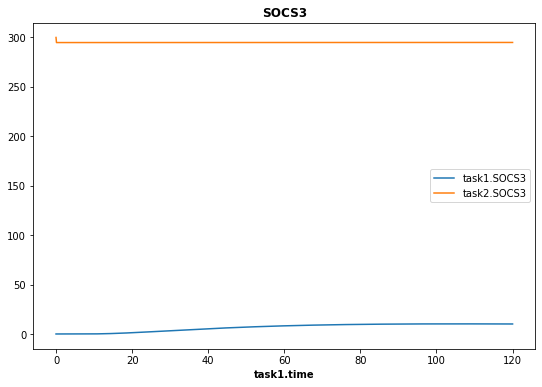

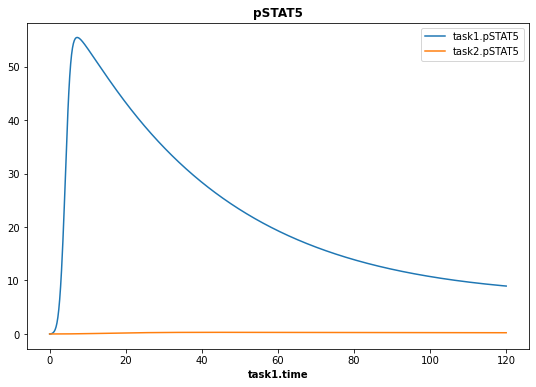

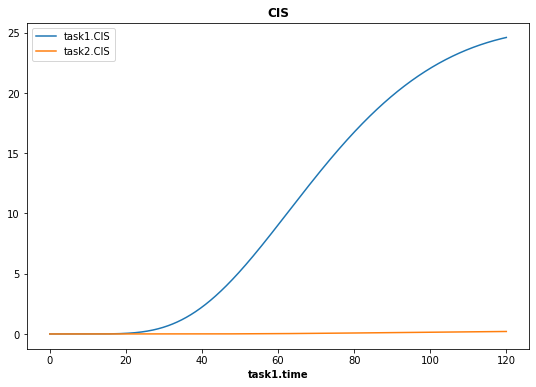

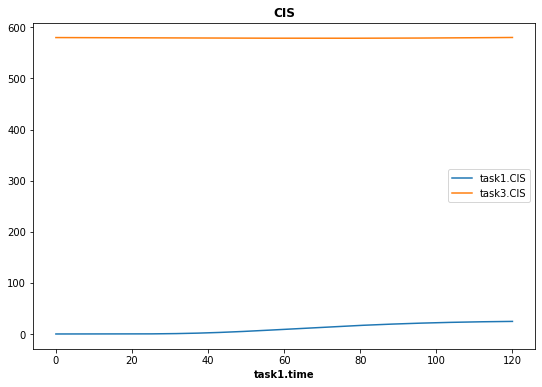

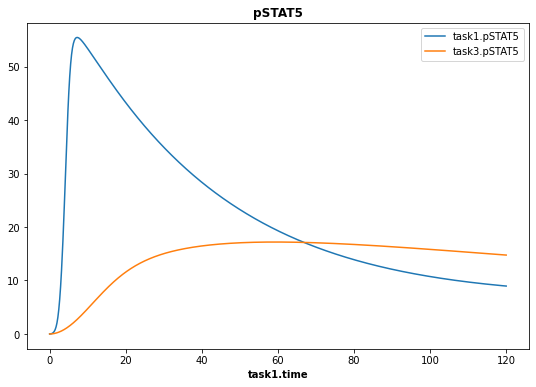

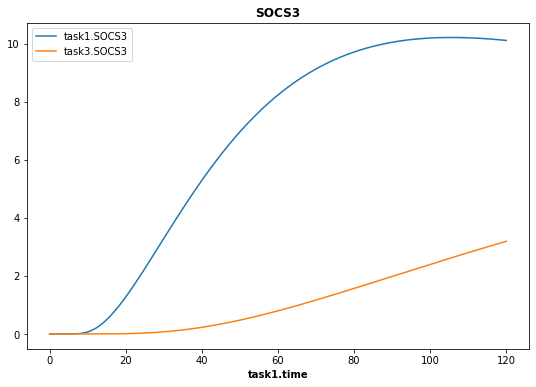

In [ ]:
# run the SED-ML files based on the referenced SBML file in ../models/ 
te.executeSEDML(sedml_str)